# make a bedfile for each peak containing fold changes, and conservation t statistics
- then get interesctions
- and compare things for intersections

In [1]:
import pandas as pd
import numpy as np

In [2]:
dmrs = pd.read_csv('../../data/dmrs_march_outs.tsv', sep='\t')

In [3]:
dmrs[[i for i in dmrs.columns if '2' in i]].columns

Index(['2', 'mammal_Astro_level2', 'primate_Astro_level2', 'mammal_CLA_level2',
       'primate_CLA_level2', 'mammal_L23_level2', 'primate_L23_level2',
       'mammal_L4_level2', 'primate_L4_level2', 'mammal_L5-ET_level2',
       'primate_L5-ET_level2', 'mammal_L5-IT_level2', 'primate_L5-IT_level2',
       'mammal_L6-CT_level2', 'primate_L6-CT_level2', 'mammal_L6-IT_level2',
       'primate_L6-IT_level2', 'mammal_L6b_level2', 'primate_L6b_level2',
       'mammal_Lamp5_level2', 'primate_Lamp5_level2', 'mammal_MG_level2',
       'primate_MG_level2', 'mammal_NP_level2', 'primate_NP_level2',
       'mammal_ODC_level2', 'primate_ODC_level2', 'mammal_OPC_level2',
       'primate_OPC_level2', 'mammal_Pvalb-BC_level2',
       'primate_Pvalb-BC_level2', 'mammal_Pvalb-ChC_level2',
       'primate_Pvalb-ChC_level2', 'mammal_Sncg_level2', 'primate_Sncg_level2',
       'mammal_Sst_level2', 'primate_Sst_level2', 'mammal_Vip_level2',
       'primate_Vip_level2', 'mammal_Vsc_level2', 'primate_Vsc_leve

In [4]:
dmrs

,3,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,mammal_Sst_level2,primate_Sst_level2,mammal_Vip_level2,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361953,human_orig_1361954,chrY,56734250,56734405,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1361954,human_orig_1361955,chrY,56858113,56858212,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1361955,human_orig_1361956,chrY,56866723,56866730,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1361956,human_orig_1361957,chrY,56880137,56880405,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
x = np.abs(dmrs['2'] - dmrs['1'])

In [7]:
import matplotlib.pyplot as plt

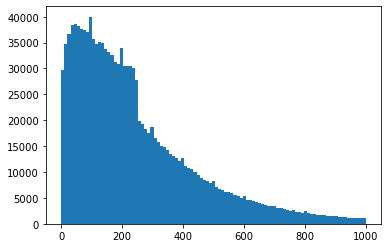

In [10]:
_ = plt.hist(x, bins=np.linspace(0, 1000, 100))

In [11]:
x.shape

(1361958,)

In [16]:
np.sum((x > 35) & (x< 1000))

1215323

## fix/add other levels

In [17]:
def list_intersection(to_intersect):
    '''
    get elements in the intersection of a group of lists/arrays
    
    args:
        to_intersect : a list of lists or other listlike objects
    returns:
        common : a numpy array of all elements common in all lists
    
    '''
    common = to_intersect[0]
    for item in to_intersect[1:]:
        common = np.intersect1d(common, item)
    return common

In [18]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [19]:
species[1:3]

['macaque', 'marmoset']

In [20]:
dmrs['mammal_level2'].sum(), dmrs['primate_level2'].sum()

(144156, 343711)

In [21]:
dmrs.mammal_level1.sum()

195435

In [22]:
dmrs.primate_level1.sum()

371964

In [23]:
dmr_bed = dmrs[['0', '1', '2', '3']]

In [24]:
dmr_bed.to_csv('../../data/ref/dmr_bed.bed', sep='\t', index=None, header=None)

In [25]:
annotate = '/home/ethan/conda_envs/homer/bin/annotatePeaks.pl'

In [26]:
!$annotate ../../data/ref/dmr_bed.bed hg38 > '../../data/outs/dmrs_annotated.tsv'


	Peak file = ../../data/ref/dmr_bed.bed
	Genome = hg38
	Organism = human
	Peak/BED file conversion summary:
		BED/Header formatted lines: 1361958
		peakfile formatted lines: 0
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 1361958
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Reading Positions...
	-----------------------
	Finding Closest TSS...
	Annotating:........................
		Annotation	Number of peaks	Total size (bp)	Log2 Ratio (obs/exp)	LogP enrichment (+values depleted)
		3UTR	17406.0	26833139	0.556	-1156.924
		miRNA	96.0	97618	1.156	-26.631
		ncRNA	4789.0	7044070	0.624	-394.457
		TTS	18991.0	32404629	0.409	-709.753
		pseudo	879.0	2111155	-0.084	3.149
		Exon	28989.0	37120946	0.824	-4003.750
		Intron	651053.0	1257910936	0.230	-13811.219
		Intergenic	614539.0	1684358

In [27]:
annots = pd.read_csv('../../data/outs/dmrs_annotated.tsv', sep='\t')

In [28]:
annots.columns.values

array(['PeakID (cmd=annotatePeaks.pl ../../data/ref/dmr_bed.bed hg38)',
       'Chr', 'Start', 'End', 'Strand', 'Peak Score',
       'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation',
       'Distance to TSS', 'Nearest PromoterID', 'Entrez ID',
       'Nearest Unigene', 'Nearest Refseq', 'Nearest Ensembl',
       'Gene Name', 'Gene Alias', 'Gene Description', 'Gene Type'],
      dtype=object)

In [29]:
dmrs.head()

,3,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,mammal_Sst_level2,primate_Sst_level2,mammal_Vip_level2,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
dmrs = dmrs.set_index("3")

In [31]:
annots = annots.set_index('PeakID (cmd=annotatePeaks.pl ../../data/ref/dmr_bed.bed hg38)')

In [32]:
annots = annots.reindex(dmrs.index)

In [33]:
annots.head()

,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
3,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14700,14710,+,0,NaN,TTS (NR_046018),TTS (NR_046018),2731,NR_106918,102466751.0,NaN,NR_106918,ENSG00000278267,MIR6859-1,hsa-mir-6859-1,microRNA 6859-1,ncRNA
human_orig_2,chr1,54490,54649,+,0,NaN,Intergenic,L2|LINE|L2,-14522,NM_001005484,79501.0,Hs.554500,NM_001005484,ENSG00000186092,OR4F5,-,olfactory receptor family 4 subfamily F member 5,protein-coding
human_orig_3,chr1,56299,56305,+,0,NaN,Intergenic,Intergenic,-12789,NM_001005484,79501.0,Hs.554500,NM_001005484,ENSG00000186092,OR4F5,-,olfactory receptor family 4 subfamily F member 5,protein-coding
human_orig_4,chr1,87724,87754,+,0,NaN,Intergenic,Intergenic,18648,NM_001005484,79501.0,Hs.554500,NM_001005484,ENSG00000186092,OR4F5,-,olfactory receptor family 4 subfamily F member 5,protein-coding
human_orig_5,chr1,91060,91550,+,0,NaN,Intergenic,Intergenic,22214,NM_001005484,79501.0,Hs.554500,NM_001005484,ENSG00000186092,OR4F5,-,olfactory receptor family 4 subfamily F member 5,protein-coding


In [34]:
dmrs['homer_annot'] = annots['Detailed Annotation']
dmrs['TSS_dist'] = annots['Distance to TSS']
dmrs['gene_name'] = annots['Gene Name']

In [35]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,TTS (NR_046018),2731,MIR6859-1
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,L2|LINE|L2,-14522,OR4F5
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Intergenic,-12789,OR4F5
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Intergenic,18648,OR4F5
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Intergenic,22214,OR4F5


In [36]:
dmrs.to_csv('../../data/outs/dmrs_annotated_with_levels_march.tsv', sep='\t')

In [37]:
dmrs['homer_annot'].value_counts().shape

(163599,)

In [38]:
[i for i in dmrs.homer_annot.value_counts().index if 'centr' in i]

['ALR/Alpha|Satellite|centr',
 'HSAT4|Satellite|centr',
 'GSAT|Satellite|centr',
 'SST1|Satellite|centr',
 'GSATII|Satellite|centr',
 'GSATX|Satellite|centr']

In [39]:
def simplify_annotation(annot_string):
    if 'exon' in annot_string:
        return 'exon'
    if 'promoter' in annot_string:
        return 'promoter'
    if 'intron' in annot_string:
        return 'intron'
    if 'Intergenic' in annot_string:
        return 'Intergenic'
    if 'TTS' in annot_string:
        return 'TTS'
    if 'CpG' in annot_string:
        return 'CpG'
    if '?' in annot_string:
        return 'uncertain'
    if annot_string.count('|') == 2:
        return annot_string.split('|')[2]
    return annot_string

In [40]:
simple_annot = [simplify_annotation(i) for i in dmrs['homer_annot']]

In [41]:
dmrs['simple_annot'] = simple_annot

In [42]:
a = pd.Series(simple_annot).value_counts()

In [43]:
import matplotlib.pyplot as plt

In [44]:
def fix_pie(to_plot,  min_percent=2):
    new_vals = {}
    new_vals['other'] = 0
    size = to_plot.sum()
    for idx in to_plot.index:
        val = to_plot[idx]
        if idx =='promoter':
            new_vals[idx] = val
        elif val/size * 100 < min_percent:
            new_vals['other'] += val
        else:
            new_vals[idx] = val
    return new_vals

In [45]:
def read_list(listfile):
    '''
    reads a newline separated list like created by save_list
    args:
        listfile: path to a textfile containing a newline separated list
    returns:
        a list of strings saved in the list file
    '''
    return open(listfile, 'r').read().strip('\n').split('\n')

In [46]:
mammal_level3 = read_list('/home/ethan/work/projects/mammalian_motor_cortex_comparative/fig2/data/outputs/final/dmrs/all_conserved.txt')

In [47]:
primate_level3 = read_list('/home/ethan/work/projects/mammalian_motor_cortex_comparative/fig2/data/outputs/final/dmrs/primate_conserved.txt')

In [48]:
dmrs['mammal_level3'] = dmrs.index.isin(mammal_level3)

In [49]:
dmrs['primate_level3'] = dmrs.index.isin(primate_level3)

In [50]:
len(primate_level3), dmrs.primate_level3.sum()

(64138, 64138)

In [51]:
a = pd.Series(dmrs.simple_annot).value_counts()

Text(0.5, 1.0, 'all dmr annotations')

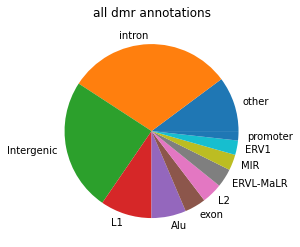

In [52]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('all dmr annotations')

In [53]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name,simple_annot,mammal_level3,primate_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,False,False


In [54]:
a = (dmrs.loc[dmrs.mammal_level0]['TSS_dist'] < 1000).value_counts()

Text(0.5, 1.0, 'mammal level 0 dmrs')

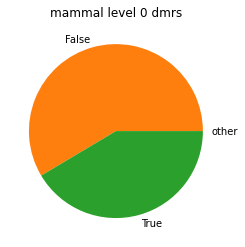

In [55]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('mammal level 0 dmrs')

In [56]:
a = (dmrs.loc[dmrs.primate_level0]['TSS_dist'] < 1000).value_counts()

Text(0.5, 1.0, 'primate level 0 dmrs')

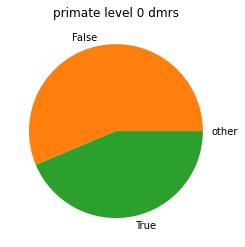

In [57]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 0 dmrs')

In [58]:
a = (dmrs.loc[dmrs.primate_level1]['TSS_dist'] < 1000).value_counts()

Text(0.5, 1.0, 'primate level 1 dmrs')

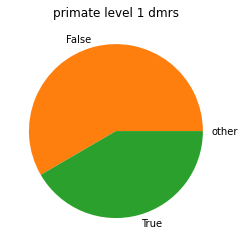

In [59]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 1 dmrs')

In [60]:
a = (dmrs.loc[dmrs.mammal_level1]['TSS_dist'] < 1000).value_counts()

Text(0.5, 1.0, 'mammal level 1 dmrs')

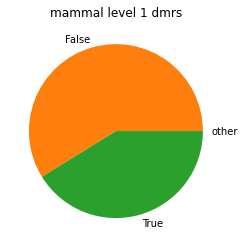

In [61]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('mammal level 1 dmrs')

In [62]:
dmrs.mammal_level2.sum(), dmrs.mammal_level1.sum()

(144156, 195435)

In [63]:
a = (dmrs.loc[dmrs.mammal_level2]['TSS_dist']< 1000).value_counts()

Text(0.5, 1.0, 'mammal level 2 dmrs')

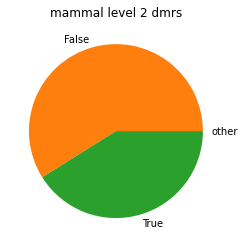

In [64]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('mammal level 2 dmrs')

In [65]:
a = dmrs.loc[dmrs.primate_level2].simple_annot.value_counts()

Text(0.5, 1.0, 'primate level 2 dmrs')

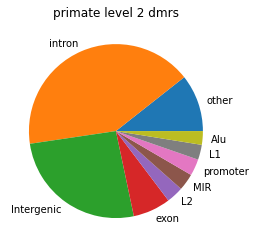

In [66]:
a = pd.Series(fix_pie(a))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 2 dmrs')

In [67]:
a = (dmrs.loc[dmrs.mammal_level3]['TSS_dist']< 1000).value_counts()

Text(0.5, 1.0, 'mammal level 3 dmrs')

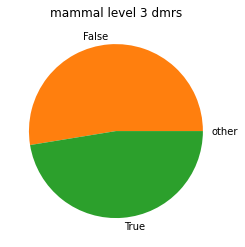

In [68]:
a = pd.Series(fix_pie(a, min_percent=1))
_ = plt.pie(a.values, labels=a.index)
plt.title('mammal level 3 dmrs')

In [69]:
a = (dmrs.loc[dmrs.primate_level3]['TSS_dist']< 1000).value_counts()

Text(0.5, 1.0, 'primate level 3 dmrs')

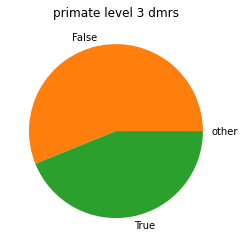

In [70]:
a = pd.Series(fix_pie(a, min_percent=2))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 3 dmrs')

In [71]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name,simple_annot,mammal_level3,primate_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,False,False


([<matplotlib.axis.XTick at 0x7f44b0d99e70>,
 [Text(1, 0, 'level 0'),
  Text(2, 0, 'level 1'),
  Text(3, 0, 'level 2'),
  Text(4, 0, 'level 3')])

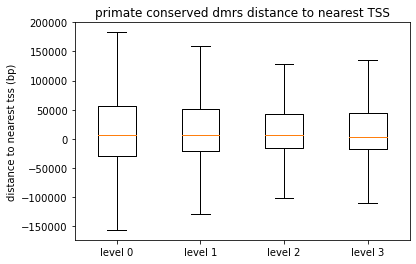

In [72]:
_ = plt.boxplot([dmrs.loc[dmrs.primate_level0]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.primate_level1]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.primate_level2]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.primate_level3]['TSS_dist'].astype(int)], showfliers=False)
plt.title('primate conserved dmrs distance to nearest TSS')
plt.ylabel('distance to nearest tss (bp)')
plt.xticks(np.arange(4) +1, labels=['level 0', 'level 1', 'level 2', 'level 3'])

([<matplotlib.axis.XTick at 0x7f44b0dd4f10>,
 [Text(1, 0, 'level 0'),
  Text(2, 0, 'level 1'),
  Text(3, 0, 'level 2'),
  Text(4, 0, 'level 3')])

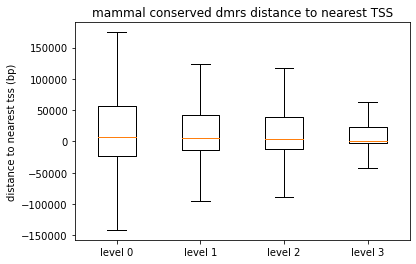

In [73]:
_ = plt.boxplot([dmrs.loc[dmrs.mammal_level0]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.mammal_level1]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.mammal_level2]['TSS_dist'].astype(int),
            dmrs.loc[dmrs.mammal_level3]['TSS_dist'].astype(int)], showfliers=False)
plt.title('mammal conserved dmrs distance to nearest TSS')
plt.ylabel('distance to nearest tss (bp)')
plt.xticks(np.arange(4) +1, labels=['level 0', 'level 1', 'level 2', 'level 3'])

In [74]:
dmrs.columns

Index(['0', '1', '2', 'mammal_level0', 'primate_level0', 'human_specific',
       'macaque_level1', 'marmoset_level1', 'mouse_level1', 'mammal_level1',
       'primate_level1', 'mammal_Astro_level2', 'primate_Astro_level2',
       'mammal_CLA_level2', 'primate_CLA_level2', 'mammal_L23_level2',
       'primate_L23_level2', 'mammal_L4_level2', 'primate_L4_level2',
       'mammal_L5-ET_level2', 'primate_L5-ET_level2', 'mammal_L5-IT_level2',
       'primate_L5-IT_level2', 'mammal_L6-CT_level2', 'primate_L6-CT_level2',
       'mammal_L6-IT_level2', 'primate_L6-IT_level2', 'mammal_L6b_level2',
       'primate_L6b_level2', 'mammal_Lamp5_level2', 'primate_Lamp5_level2',
       'mammal_MG_level2', 'primate_MG_level2', 'mammal_NP_level2',
       'primate_NP_level2', 'mammal_ODC_level2', 'primate_ODC_level2',
       'mammal_OPC_level2', 'primate_OPC_level2', 'mammal_Pvalb-BC_level2',
       'primate_Pvalb-BC_level2', 'mammal_Pvalb-ChC_level2',
       'primate_Pvalb-ChC_level2', 'mammal_Sncg_level

In [75]:
a = dmrs.loc[dmrs.hyper_not_hypo_mammal].simple_annot.value_counts()

Text(0.5, 1.0, 'primate level 3 dmrs')

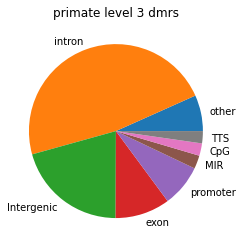

In [76]:
a = pd.Series(fix_pie(a, min_percent=2))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 3 dmrs')

In [77]:
a = dmrs.loc[dmrs.hyper_not_hypo_mammal].simple_annot.value_counts()

Text(0.5, 1.0, 'primate level 3 dmrs')

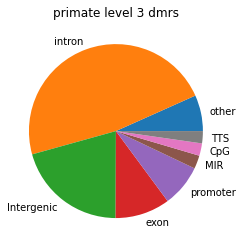

In [78]:
a = pd.Series(fix_pie(a, min_percent=2))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 3 dmrs')

In [79]:
a = dmrs.loc[dmrs.hyper_not_hypo_mammal].simple_annot.value_counts()

Text(0.5, 1.0, 'mammal level 3 hyper dmrs')

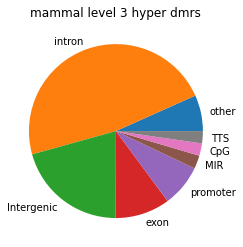

In [80]:
a = pd.Series(fix_pie(a, min_percent=2))
_ = plt.pie(a.values, labels=a.index)
plt.title('mammal level 3 hyper dmrs')

In [81]:
a = dmrs.loc[dmrs.hyper_not_hypo_primate].simple_annot.value_counts()

Text(0.5, 1.0, 'primate level 3 hyper dmrs')

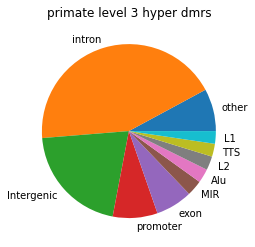

In [82]:
a = pd.Series(fix_pie(a, min_percent=2))
_ = plt.pie(a.values, labels=a.index)
plt.title('primate level 3 hyper dmrs')

In [83]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name,simple_annot,mammal_level3,primate_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,False,False


In [84]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,TSS_dist,gene_name,simple_annot,mammal_level3,primate_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,False,False


In [85]:
a = (dmrs.loc[dmrs.human_specific]['TSS_dist'] < 1000).value_counts()

Text(0.5, 1.0, 'human sequence specific dmrs')

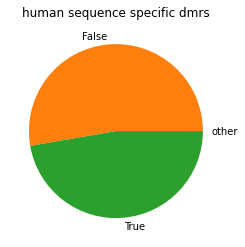

In [86]:
a = pd.Series(fix_pie(a, min_percent=1))
_ = plt.pie(a.values, labels=a.index)
plt.title('human sequence specific dmrs')

In [87]:
dmrs.human_specific.value_counts()

False    1307129
True       54829
Name: human_specific, dtype: int64

In [88]:
dmrs.loc[dmrs.human_specific].shape

(54829, 61)

In [89]:
# dmrs[['0', '1', '2']]

In [90]:
dmrs.columns

Index(['0', '1', '2', 'mammal_level0', 'primate_level0', 'human_specific',
       'macaque_level1', 'marmoset_level1', 'mouse_level1', 'mammal_level1',
       'primate_level1', 'mammal_Astro_level2', 'primate_Astro_level2',
       'mammal_CLA_level2', 'primate_CLA_level2', 'mammal_L23_level2',
       'primate_L23_level2', 'mammal_L4_level2', 'primate_L4_level2',
       'mammal_L5-ET_level2', 'primate_L5-ET_level2', 'mammal_L5-IT_level2',
       'primate_L5-IT_level2', 'mammal_L6-CT_level2', 'primate_L6-CT_level2',
       'mammal_L6-IT_level2', 'primate_L6-IT_level2', 'mammal_L6b_level2',
       'primate_L6b_level2', 'mammal_Lamp5_level2', 'primate_Lamp5_level2',
       'mammal_MG_level2', 'primate_MG_level2', 'mammal_NP_level2',
       'primate_NP_level2', 'mammal_ODC_level2', 'primate_ODC_level2',
       'mammal_OPC_level2', 'primate_OPC_level2', 'mammal_Pvalb-BC_level2',
       'primate_Pvalb-BC_level2', 'mammal_Pvalb-ChC_level2',
       'primate_Pvalb-ChC_level2', 'mammal_Sncg_level

In [91]:
dmrs = dmrs.rename(axis=1, mapper={'0' : 'chrm',
                            '1':'start',
                            '2':'end',
                            'TSS_dist' : 'tss_dist',
                            'Gene Name' : 'nearest_gene_tss'
                                  }) 

In [92]:
out1 = '../../../fig2/data/outputs/dmr_gls_results/human_origin/'
out2 = '../../../fig2/data/outputs/dmr_gls_results/primate_sequence/'

In [93]:
pairs_use = [('human', 'macaque'), ('human', 'marmoset'), ('human', 'mouse'), ('macaque', 'marmoset'), ('macaque', 'mouse'), ('marmoset', 'mouse')]

In [100]:
m_cons = []
p_cons = []
m_idx = []
for pair in pairs_use:
    spec1, spec2 = pair
    if 'mouse' in pair:
        stats = pd.read_csv(out1 + '/gls_inverse_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('Unnamed: 0')
        m_idx.append(stats.index)
    else:
        stats = pd.read_csv(out2 + '/gls_inverse_{}_{}.tsv'.format(spec1, spec2), sep='\t').set_index('Unnamed: 0')
        p_cons.append(stats.t_val.rename(f'{spec1}_{spec2}'))
    m_cons.append(stats.t_val.rename(f'{spec1}_{spec2}'))
m_cons = pd.concat(m_cons, axis=1)
m_cons = m_cons.loc[np.unique(np.concatenate(m_idx))]
p_cons = pd.concat(p_cons, axis=1)

In [101]:
m_cons

,human_macaque,human_marmoset,human_mouse,macaque_marmoset,macaque_mouse,marmoset_mouse
Unnamed: 0,,,,,,
human_orig_10000,2.592546,5.172121,3.032083,3.582525,1.859152,3.814196
human_orig_1000004,2.876157,NaN,3.872590,NaN,3.828076,NaN
human_orig_100002,6.368515,2.496007,1.928874,2.938908,6.775365,0.140711
human_orig_1000022,4.415204,1.457363,2.920170,1.993853,2.996646,3.840362
human_orig_1000038,4.167794,6.280131,3.043317,4.317873,1.869411,2.869073
...,...,...,...,...,...,...
human_orig_999956,2.848557,3.377377,2.691110,2.300615,2.681105,1.134267
human_orig_99997,-0.497905,0.059005,4.699958,-0.337237,1.646768,2.480618
human_orig_999978,2.257872,NaN,4.320738,NaN,2.070504,NaN


In [102]:
p_cons

,human_macaque,human_marmoset,macaque_marmoset
Unnamed: 0,,,
human_orig_1000,2.216178,0.380729,2.326057
human_orig_10000,2.592546,5.172121,3.582525
human_orig_1000001,2.581069,NaN,NaN
human_orig_1000002,3.004720,1.533333,0.765015
human_orig_1000003,5.729665,NaN,NaN
...,...,...,...
human_orig_651777,NaN,NaN,2.543413
human_orig_745436,NaN,NaN,5.284718
human_orig_763080,NaN,NaN,-0.514831


In [104]:
# drop shared values
p_cons_ = p_cons.loc[~p_cons.index.isin(m_cons.index)] 

In [105]:
p_cons_.shape

(600977, 3)

In [113]:
all_cons = pd.concat([m_cons, p_cons_], axis=0)

In [114]:
all_cons.head()

,human_macaque,human_marmoset,human_mouse,macaque_marmoset,macaque_mouse,marmoset_mouse
Unnamed: 0,,,,,,
human_orig_10000,2.592546,5.172121,3.032083,3.582525,1.859152,3.814196
human_orig_1000004,2.876157,NaN,3.872590,NaN,3.828076,NaN
human_orig_100002,6.368515,2.496007,1.928874,2.938908,6.775365,0.140711
human_orig_1000022,4.415204,1.457363,2.920170,1.993853,2.996646,3.840362
human_orig_1000038,4.167794,6.280131,3.043317,4.317873,1.869411,2.869073


In [116]:
all_cons.shape

(1019672, 6)

In [117]:
all_cons = all_cons.drop_duplicates()

In [118]:
all_cons.shape

(1019469, 6)

In [115]:
dmrs.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,hyper_not_hypo_mammal,hyper_not_hypo_primate,mammal_level2,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,TTS (NR_046018),2731,MIR6859-1,TTS,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,18648,OR4F5,Intergenic,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,Intergenic,22214,OR4F5,Intergenic,False,False


In [132]:
df = dmrs.loc[all_cons.index]

In [133]:
df.shape

(929067, 61)

In [134]:
x = np.abs(df['start'] - df['end'])

In [135]:
use_dmrs = (x>35) & (x < 1000)

In [136]:
np.sum(use_dmrs)

929067

In [137]:
all_cons = all_cons[use_dmrs]

In [138]:
df = df[use_dmrs]

In [141]:
df['shortname'] = df['chrm'] + '-' + df['start'].astype(str) + '-' + df['end'].astype(str)

In [142]:
all_cons['index'] = df['shortname']

In [144]:
all_cons.to_csv('../../data/human_origin_dmr_pairwise_cons_index.tsv', sep='\t')

In [145]:
all_cons.shape

(929067, 7)

In [95]:
m_cons = m_cons.fillna(0).mean(axis=1)
p_cons = p_cons.fillna(0).mean(axis=1)

In [29]:
m_cons.to_csv('../../../fig2/data/for_figures/dmr_cons_mammal.tsv', sep='\t')
p_cons.to_csv('../../../fig2/data/for_figures/dmr_cons_primate.tsv', sep='\t')

In [24]:
p_cons.head()

Unnamed: 0
human_orig_1000       1.640988
human_orig_10000      3.782397
human_orig_1000001    2.581069
human_orig_1000002    1.767690
human_orig_1000003    5.729665
dtype: float64

In [9]:
m_cons.shape

(418695, 6)

In [7]:
p_cons.shape

(1005526, 3)

In [83]:
dmrs['conservation_idx'] = m_cons

In [84]:
dmrs['conservation_idx_primate'] = p_cons

In [85]:
dmrs.to_csv('../../data/outs/dmrs_final_annot.tsv', sep='\t')

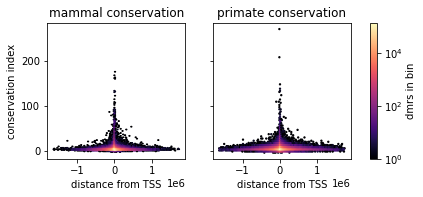

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(6.8, 2.5), sharex=True, sharey=True)
axs = axs.flatten()
axs[0].hexbin(dmrs.tss_dist, dmrs.conservation_idx, mincnt=1, bins='log', cmap='magma', rasterized=True)
im = axs[1].hexbin(dmrs.tss_dist, dmrs.conservation_idx_primate, mincnt=1, bins='log', cmap='magma', rasterized=True) 
axs[0].set_title('mammal conservation')
axs[1].set_title('primate conservation')

# axs[0].set_ylim(-5, 213)
axs[1].set_xlabel('distance from TSS')
axs[0].set_xlabel('distance from TSS')

axs[0].set_ylabel('conservation index')
cbar = fig.colorbar(im, ax=axs.ravel().tolist()) 
cbar.set_label('dmrs in bin')
plt.savefig('../../figures/dmr_cons_vs_tss_dist_long.pdf', dpi=400, bbox_inches='tight', transparent=True)

In [87]:
def my_log(inputs):
    inputs = inputs.copy()
    inputs[inputs < 1] = 1
    return np.log2(inputs)

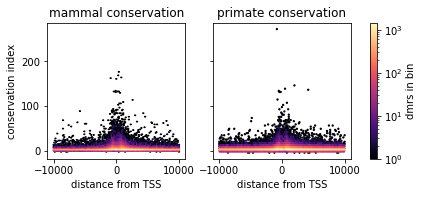

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(6.8, 2.5), sharex=True, sharey=True)
axs = axs.flatten()
dmrs_use = dmrs.loc[dmrs.tss_dist.abs() < 10000]
axs[0].hexbin(dmrs_use.tss_dist, dmrs_use.conservation_idx, mincnt=1, bins='log', cmap='magma', rasterized=True)
# axs[0].set_ylim(-8, 213)
# axs[0].set_ylim(-5, 21)
im = axs[1].hexbin(dmrs_use.tss_dist, dmrs_use.conservation_idx_primate, mincnt=1, bins='log', cmap='magma', rasterized=True)
axs[1].set_xlabel('distance from TSS')
axs[0].set_xlabel('distance from TSS')
axs[0].set_ylabel('conservation index')
axs[0].set_title('mammal conservation')
axs[1].set_title('primate conservation')
cbar = fig.colorbar(im, ax=axs.ravel().tolist()) 
cbar.set_label('dmrs in bin')
plt.savefig('../../figures/dmr_cons_vs_tss_dist_short.pdf', dpi=400, bbox_inches='tight', transparent=True)

NameError: name 'peaks' is not defined

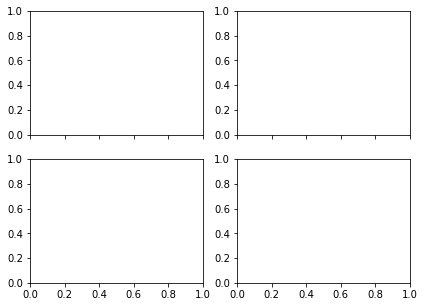

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(6.8, 5), sharex=True, sharey=False)
axs = axs.flatten()
peaks_use = peaks.loc[peaks.nearest_tss_dist.abs() < 100000]
axs[0].hexbin(peaks_use.nearest_tss_dist, peaks_use.conservation_idx, mincnt=1, bins='log', cmap='magma')
im = axs[2].hexbin(peaks_use.nearest_tss_dist, peaks_use.divergence_idx, mincnt=1, bins='log', cmap='magma') 
axs[2].set_xlabel('distance from TSS')
axs[0].set_ylabel('conservation index')
axs[2].set_ylabel('divergence index')
axs[1].hexbin(peaks_use.nearest_tss_dist, peaks_use.conservation_idx_primate, mincnt=1, bins='log', cmap='magma')
im = axs[3].hexbin(peaks_use.nearest_tss_dist, peaks_use.divergence_idx_primate, mincnt=1, bins='log', cmap='magma') 
axs[3].set_xlabel('distance from TSS')
# axs[2].set_ylabel('conservation index')
# axs[3].set_ylabel('divergence index')
axs[0].set_title('mammal conservation')
axs[1].set_title('primate conservation')
cbar = fig.colorbar(im, ax=axs.ravel().tolist()) 
cbar.set_label('peaks in bin')

In [1]:
import pandas as pd
import numpy as np

In [2]:
dmrs= pd.read_csv('../../data/outs/dmrs_final_annot.tsv', sep='\t')

In [3]:
dmrs.head()

,3,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,mammal_level2,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,False,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,False,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,False,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN


In [4]:
dmrs.mammal_level0.sum()

579026

In [5]:
dmrs.shape

(1361958, 64)

In [7]:
dmrs.human_specific.sum()

54829

In [8]:
dmrs.mammal_level1.sum()

195435

In [10]:
dmrs.mammal_level2.sum()

144156

In [11]:
dmrs.mammal_level3.sum()

23414